In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Importing dataset

In [71]:
df=pd.read_csv(r"C:\Users\kibe\Downloads\abcnews-date-text.csv\abcnews-date-text.csv")

df


,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


# Preprocessing

In [72]:
data = df.sample(n=100000, axis=0) #to select only a million rows to use in our dataset 

In [73]:
#to extract the headline_text column and give it the variable name data
data= data['headline_text']   
data

143793                    power restoration enters third day
727257           pm calls in sick as carr covers in new york
412846             chinese lollies to be pulled from shelves
1193347    pub choir coronavirus inspired couch event dra...
907576     biosecurity tasmania explains the decision on ...
                                 ...                        
1057708              car fire on hindmarsh drive in canberra
258635                melbourne water restrictions tightened
514554                 bypass tipped to aid gladstone growth
321373        meeting considers residents rasp mine concerns
363448              press banned from andersons cabaret show
Name: headline_text, Length: 100000, dtype: object

In [74]:
#lemmatization and removing stopwords


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return words



data = data.apply(preprocess)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kibe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


143793              [power, restoration, enters, third, day]
727257              [pm, call, sick, carr, cover, new, york]
412846                       [chinese, lolly, pulled, shelf]
1193347    [pub, choir, coronavirus, inspired, couch, eve...
907576     [biosecurity, tasmania, explains, decision, or...
                                 ...                        
1057708              [car, fire, hindmarsh, drive, canberra]
258635            [melbourne, water, restriction, tightened]
514554              [bypass, tipped, aid, gladstone, growth]
321373     [meeting, considers, resident, rasp, mine, con...
363448              [press, banned, anderson, cabaret, show]
Name: headline_text, Length: 100000, dtype: object

In [80]:


# Create a dictionary from the preprocessed data
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))



Topic: 0
Words: ['council', 'win', 'interview', 'home', 'sa', 'world', 'claim', 'first', 'test', 'talk']
Topic: 1
Words: ['police', 'man', 'court', 'woman', 'death', 'crash', 'car', 'hit', 'face', 'child']
Topic: 2
Words: ['new', 'say', 'u', 'call', 'australia', 'plan', 'fire', 'back', 'govt', 'water']
Topic: 3
Words: ['nsw', 'year', 'day', 'take', 'election', 'set', 'one', 'road', 'record', 'final']
Topic: 4
Words: ['australian', 'sydney', 'get', 'attack', 'may', 'market', 'farmer', 'killed', 'open', 'rise']


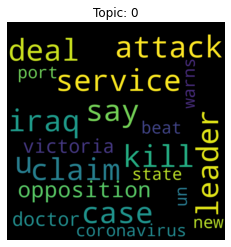

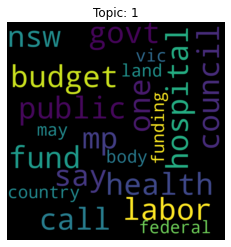

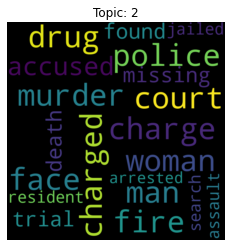

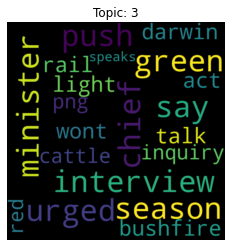

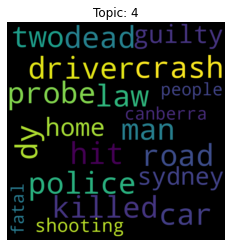

In [81]:


# Plot a wordcloud for each topic
for topic_id, topic in enumerate(lda_model.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()
